In [1]:
#2
#Importamos las librerias necesarias.
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Leyendo datos del primer archivo.
dfsargento1 = pd.read_csv("sargento_201117.csv", skiprows=2, header=None, names=['Num','Date','AbsPres','Temp','Water Level'])
dfsargento1 = dfsargento1[:-1]
dfsargento1.tail()

,Num,Date,AbsPres,Temp,Water Level
2389,2390,11/20/2017 10:15:00,106.986,21.855,-0.013
2390,2391,11/20/2017 10:30:00,106.998,21.760,-0.012
2391,2392,11/20/2017 10:45:00,106.998,21.760,-0.012
2392,2393,11/20/2017 11:00:00,106.950,21.760,-0.017
2393,2394,11/20/2017 11:15:00,106.966,21.760,-0.015


In [3]:
#Leyendo datos del segundo archivo.
dfsargento2 = pd.read_csv("sargento-salinidad-201117.csv", skiprows=3, header=None, names=['Num','Date','CondHighRng','Temp','SpecConduct','Salinity'])
dfsargento2.tail()

,Num,Date,CondHighRng,Temp,SpecConduct,Salinity
2389,2391,11/20/2017 10:15:00,54525.5,22.12,57766.8,38.5173
2390,2392,11/20/2017 10:30:00,54525.5,22.09,57802.3,38.5440
2391,2393,11/20/2017 10:45:00,54525.5,22.08,57814.1,38.5530
2392,2394,11/20/2017 11:00:00,54525.5,22.08,57814.1,38.5530
2393,2395,11/20/2017 11:15:00,54525.5,22.06,57837.8,38.5708


In [4]:
#Revisando datos del primer archivo.
dfsargento1.dtypes

Num              int64
Date            object
AbsPres        float64
Temp           float64
Water Level    float64
dtype: object

In [5]:
#Revisando datos del segundo archivo.
dfsargento2.dtypes

Num              int64
Date            object
CondHighRng    float64
Temp           float64
SpecConduct    float64
Salinity       float64
dtype: object

In [6]:
#Cambiando el formato de la fecha, para poder usarlo como variable.

#Archivo 1.
dfsargento1['Ndate'] = pd.to_datetime(dfsargento1['Date'], format='%m/%d/%Y %H:%M:%S')
dfsargento1['Month'] = dfsargento1['Ndate'].dt.month

#Archivo 2.
dfsargento2['Ndate'] = pd.to_datetime(dfsargento2['Date'], format='%m/%d/%Y %H:%M:%S')
dfsargento2['Month'] = dfsargento2['Ndate'].dt.month

In [7]:
#Revisando las nuevas variables de tiempo del primer archivo.
dfsargento1.dtypes

Num                     int64
Date                   object
AbsPres               float64
Temp                  float64
Water Level           float64
Ndate          datetime64[ns]
Month                   int64
dtype: object

In [8]:
#Revisando las nuevas variables de tiempo del segundo archivo.
dfsargento2.dtypes

Num                     int64
Date                   object
CondHighRng           float64
Temp                  float64
SpecConduct           float64
Salinity              float64
Ndate          datetime64[ns]
Month                   int64
dtype: object

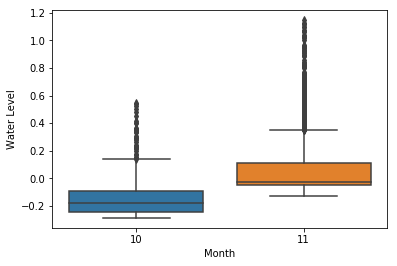

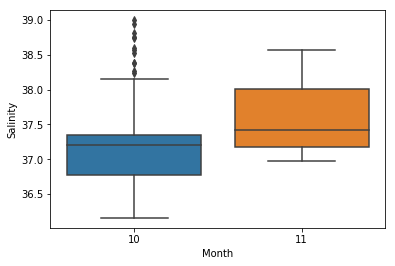

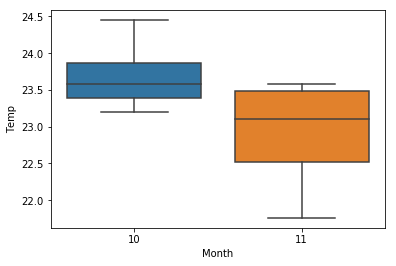

In [9]:
#3
#Boxplot Meses/Water level.
ax = sns.boxplot(x="Month", y="Water Level", data=dfsargento1)
plt.show()

#Boxplot Meses/Salinity.
ax = sns.boxplot(x="Month", y="Salinity", data=dfsargento2)
plt.show()

#Boxplot Meses/Temperatura.
ax = sns.boxplot(x="Month", y="Temp", data=dfsargento1)
plt.show()

In [10]:
#Exactitud de la posición de la mediana, cuarteles, máximos y mínimos del primer archivo.
dfsargento1.describe()

,Num,AbsPres,Temp,Water Level,Month
count,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000
mean,1197.500000,107.430007,23.120883,0.030863,10.781119
std,691.232595,2.371844,0.563555,0.235974,0.413574
min,1.000000,104.229000,21.760000,-0.288000,10.000000
25%,599.250000,106.407000,22.525000,-0.071000,11.000000
50%,1197.500000,106.764000,23.388000,-0.035000,11.000000
75%,1795.750000,107.305000,23.484000,0.018750,11.000000
max,2394.000000,118.641000,24.448000,1.146000,11.000000


In [11]:
#Exactitud de la posición de la mediana, cuarteles, máximos y mínimos del primer archivo del segundo archivo.
dfsargento2.describe()

,Num,CondHighRng,Temp,SpecConduct,Salinity,Month
count,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000
mean,1198.500000,54524.972807,23.316646,56386.831662,37.479737,10.781119
std,691.232595,11.876669,0.547033,619.501987,0.464974,0.413574
min,2.000000,54105.700000,21.490000,54622.100000,36.158800,10.000000
25%,600.250000,54525.500000,22.730000,55949.700000,37.151400,11.000000
50%,1198.500000,54525.500000,23.490000,56185.600000,37.328300,11.000000
75%,1796.750000,54525.500000,23.700000,57053.700000,37.980300,11.000000
max,2395.000000,54525.500000,24.910000,58398.700000,38.994200,11.000000


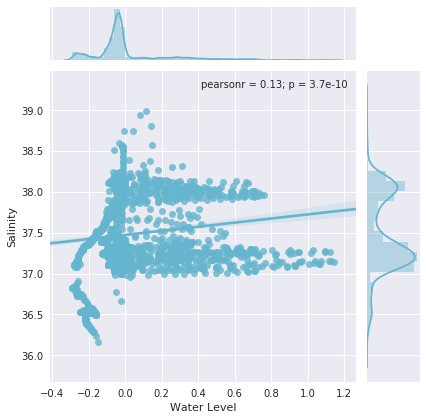

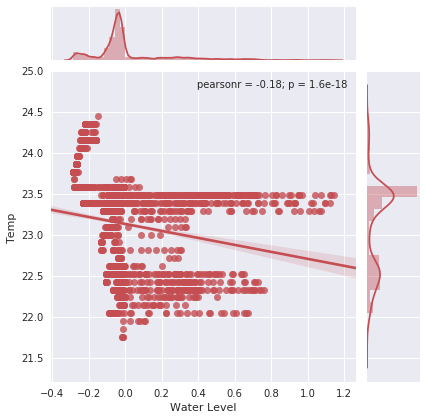

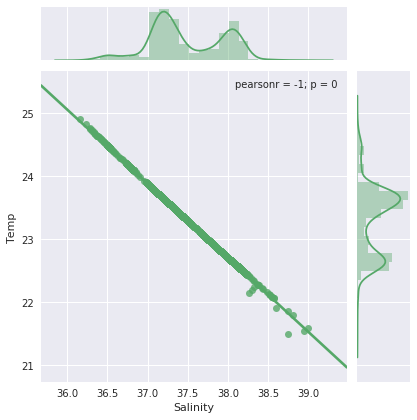

In [12]:
#4
#Correlación de Pearson entre Water Level y Salinidad.
sns.set(style="darkgrid", color_codes=True)
dfsargento3=pd.concat([dfsargento1, dfsargento2], axis=1, join_axes=[dfsargento2.index])
sns.jointplot("Water Level", "Salinity", data=dfsargento3,kind="reg", color="c")
plt.show()

#Correlación de Pearson entre Water Level y Temperatura.
sns.set(style="darkgrid", color_codes=True)
sns.jointplot("Water Level", "Temp", data=dfsargento1,kind="reg", color="r")
plt.show()

#Correlación de Pearson entre Salinidad y Temperatura.
sns.set(style="darkgrid", color_codes=True)
sns.jointplot("Salinity", "Temp", data=dfsargento2,kind="reg", color="g")
plt.show()

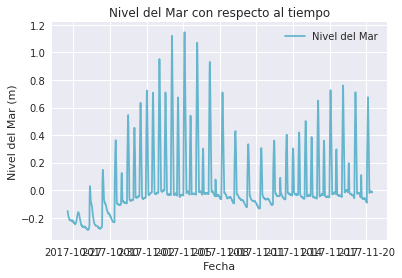

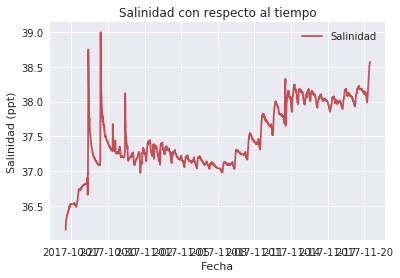

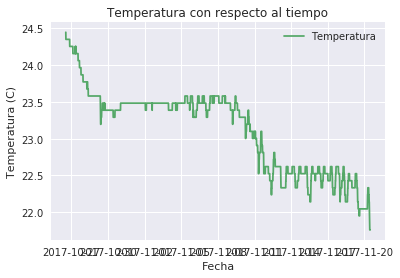

In [13]:
#5
#Gráfica independiente de Nivel del Mar en función del tiempo.
WL = dfsargento1['Water Level']
Date = dfsargento1['Ndate']
plt.plot(Date, WL, "c", label='Nivel del Mar'); plt.legend(loc='best')
plt.title('Nivel del Mar con respecto al tiempo')
plt.ylabel('Nivel del Mar (m)')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()

#Gráfica independiente de Salinidad en función del tiempo.
Sal = dfsargento2['Salinity']
Date = dfsargento2['Ndate']
plt.plot(Date, Sal, "r", label='Salinidad'); plt.legend(loc='best')
plt.title('Salinidad con respecto al tiempo')
plt.ylabel('Salinidad (ppt)')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()

#Gráfica independiente de Temperatura en función del tiempo.
Temp = dfsargento1['Temp']
Date = dfsargento1['Ndate']
plt.plot(Date, Temp, "g", label='Temperatura'); plt.legend(loc='best')
plt.title('Temperatura con respecto al tiempo')
plt.ylabel('Temperatura (C)')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()

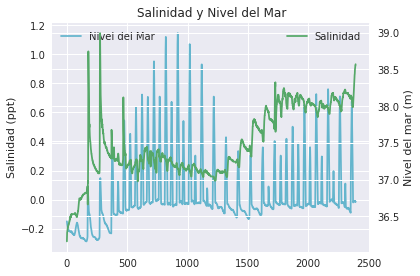

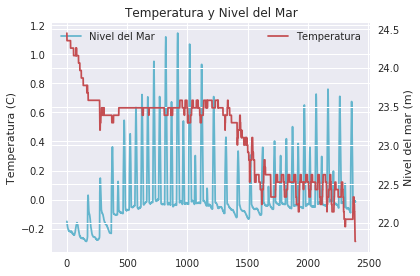

In [14]:
#6
#Grafica de doble eje Salinidad y nivel del mar
fig, ax1 = plt.subplots()
sal=dfsargento2['Salinity']
WL=dfsargento1['Water Level']
plt.title('Salinidad y Nivel del Mar')
ax1.plot(WL,'c', label='Nivel del Mar'); plt.legend(loc='upper left')
ax1.set_ylabel('Salinidad (ppt)')
ax2 = ax1.twinx()
ax2.plot(sal , 'g', label='Salinidad'); plt.legend(loc='upper right')
ax2.set_ylabel('Nivel del mar (m)')
fig.tight_layout()
plt.show()

#Grafica de doble eje Nivel del Mar y Temperatura.
fig, ax1 = plt.subplots()
temp=dfsargento1['Temp']
WL=dfsargento1['Water Level']
plt.title('Temperatura y Nivel del Mar')
ax1.plot(WL,'c', label='Nivel del Mar'); plt.legend(loc='upper left')
ax1.set_ylabel('Temperatura (C)')
ax2 = ax1.twinx()
ax2.plot(temp , 'r', label='Temperatura'); plt.legend(loc='upper right')
ax2.set_ylabel('Nivel del mar (m)')
fig.tight_layout()
plt.show()

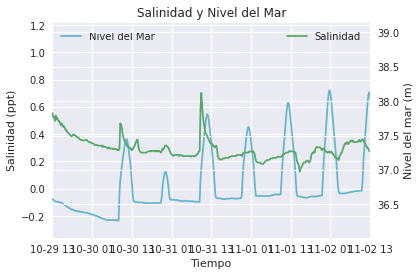

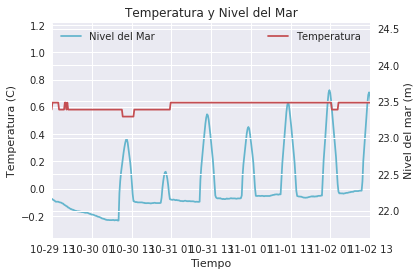

In [15]:
#7
#Grafica de doble eje Salinidad y nivel del mar del 29/10/2017 - 2/11/2017.
fig, ax1 = plt.subplots()
date=dfsargento1['Ndate']
sal=dfsargento2['Salinity']
WL=dfsargento1['Water Level']
plt.title('Salinidad y Nivel del Mar')
ax1.plot(date,WL,'c', label='Nivel del Mar'); plt.legend(loc='upper left')
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('Salinidad (ppt)')
ax2 = ax1.twinx()
ax2.plot(date, sal , 'g', label='Salinidad'); plt.legend(loc='upper right')
ax2.set_ylabel('Nivel del mar (m)')
fig.tight_layout()
plt.xlim(("2017-10-29 13:00:00","2017-11-2 13:00:00"))
plt.show()

#Grafica de doble eje Nivel del Mar y Temperatura del 29/10/2017 - 2/11/2017.
fig, ax1 = plt.subplots()
date=dfsargento1['Ndate']
temp=dfsargento1['Temp']
WL=dfsargento1['Water Level']
plt.title('Temperatura y Nivel del Mar')
ax1.plot(date, WL ,'c', label='Nivel del Mar'); plt.legend(loc='upper left')
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('Temperatura (C)')
ax2 = ax1.twinx()
ax2.plot(date, temp , 'r', label='Temperatura'); plt.legend(loc='upper right')
ax2.set_ylabel('Nivel del mar (m)')
fig.tight_layout()
plt.xlim(("2017-10-29 13:00:00","2017-11-2 13:00:00"))
plt.show()